 Polina Lyubavina
 
 u0895721
 
 Homework #5

In [137]:
# Imports and setup. 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 18)
plt.style.use('ggplot')

## Part 1: MNIST Handwritten Digits

In [138]:
# Code to scale images...

digits = load_digits()
X = scale( digits.data )
y = digits.target

n_samples, n_features = X.shape
n_digits = len( np.unique(digits.target) )

print( "n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features) )

n_digits: 10, n_samples 1797, n_features 64


In [139]:
# This is what one digit (the "zero") looks like:

print( "===\nThe raw data" )
print( digits.images[0] )

print( "===\nThe scaled data" )
print( X[0] )

print( "===\nThe digit" )
print( digits.target[0] )

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

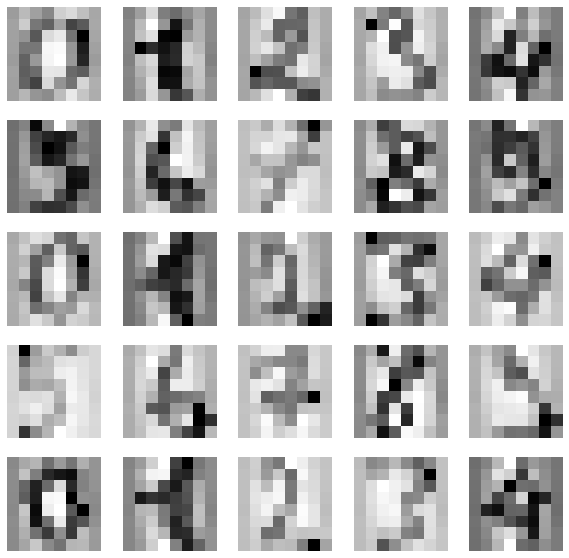

In [140]:
# Display the first 25 images...

plt.figure( figsize=(10, 10) )
 
for ii in np.arange( 25 ):
    plt.subplot( 5, 5, ii+1 )
    plt.imshow( np.reshape( X[ii,:], (8,8) ), cmap='Greys', interpolation='nearest' )
    plt.axis( 'off' )

plt.show()

### Task 1.1: Classification with Support Vector Machines (SVM)

In [141]:
# Split the data into a training and test set

XTrain, XTest, yTrain, yTest = train_test_split( X, y, random_state=1, test_size=0.8 )

SVM :

In [142]:
#model

model = svm.SVC( kernel='rbf', C=5 )
model.fit( XTrain, yTrain )

SVC(C=5)

In [143]:
# confusion matrix and prediction

y_pred = model.predict(XTest)

print(confusion_matrix(yTest,y_pred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]


(0.0, 1.0, 0.0, 1.0)

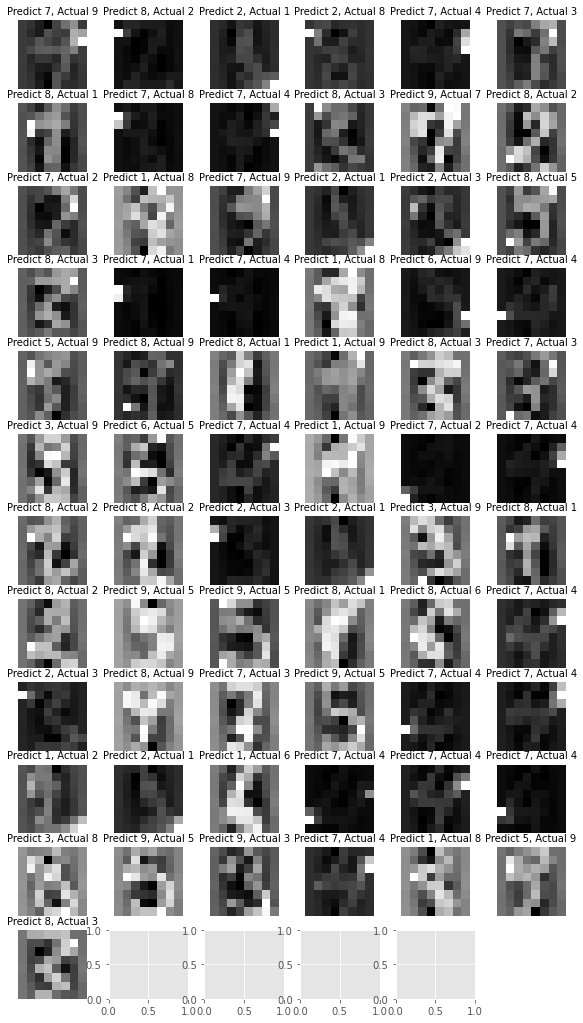

In [144]:
# display all of the misclassified digits as images

misclassifiedIndex = np.where(yTest != y_pred)[0]

figure, axis = plt.subplots(12, 6)
axis = axis.ravel()
for i, wrongIndex in enumerate(misclassifiedIndex) :
    axis[i].imshow(np.reshape(XTest[wrongIndex], (8,8)), cmap=plt.cm.gray)
    axis[i].set_title(f'Predict {y_pred[wrongIndex]}, '
                    f'Actual {yTest[wrongIndex]}', fontsize = 10)
    axis[i].set(frame_on=False)
    axis[i].axis('off')
plt.box(False)
plt.axis('off')

In [145]:
# Accuracy of the SVM using cross_mal_score() with .5 to 5 (by .1) 

for c_val in np.arange( .5, 5.1,  .1):
    model = svm.SVC( kernel='rbf', C=c_val )
    scores = cross_val_score( model, X, y, cv=5 )
    print( "Used", c_val, "as C and got scores", np.mean(scores) )

Used 0.5 as C and got scores 0.936564531104921
Used 0.6 as C and got scores 0.9382342927886104
Used 0.7 as C and got scores 0.9410136180748994
Used 0.7999999999999999 as C and got scores 0.9449102445063448
Used 0.8999999999999999 as C and got scores 0.9465784586815227
Used 0.9999999999999999 as C and got scores 0.9493624264933457
Used 1.0999999999999999 as C and got scores 0.9499179820489012
Used 1.1999999999999997 as C and got scores 0.9504735376044569
Used 1.2999999999999998 as C and got scores 0.9510290931600123
Used 1.4 as C and got scores 0.9521417517796348
Used 1.4999999999999998 as C and got scores 0.9532528628907458
Used 1.5999999999999996 as C and got scores 0.9532528628907458
Used 1.6999999999999997 as C and got scores 0.9538099659548127
Used 1.7999999999999998 as C and got scores 0.9532528628907458
Used 1.8999999999999997 as C and got scores 0.9538084184463014
Used 1.9999999999999996 as C and got scores 0.954363974001857
Used 2.0999999999999996 as C and got scores 0.95436397

In [146]:
# Accuracy of the SVM using cross_mal_score() with 10-50 (by 20)

for c_val in range( 10, 51,  20):
    model = svm.SVC( kernel='rbf', C=c_val )
    scores = cross_val_score( model, X, y, cv=5 )
    print( "Used", c_val, "as C and got scores", np.mean(scores) )

Used 10 as C and got scores 0.9538053234292789
Used 30 as C and got scores 0.9538053234292789
Used 50 as C and got scores 0.9538053234292789


The best value is 2.7999999999999994 as C and 0.9554750851129681 score, and 2.8999999999999995 as C and 0.9554750851129681 score

### Task 1.2: Prediction with K-nearest Neighbors

KNN : 

In [147]:
# Split data into training and test sets

XTrainKNN, XTestKNN, yTrainKNN, yTestKNN = train_test_split( X, y, random_state=1, test_size=0.8 )

In [148]:
#model

model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit( XTrainKNN, yTrainKNN )

KNeighborsClassifier(n_neighbors=10)

In [149]:
# confusion matrix and prediction

knn_y_pred = model_knn.predict(XTestKNN)

print(confusion_matrix(yTestKNN, knn_y_pred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]


(-0.5, 7.5, 7.5, -0.5)

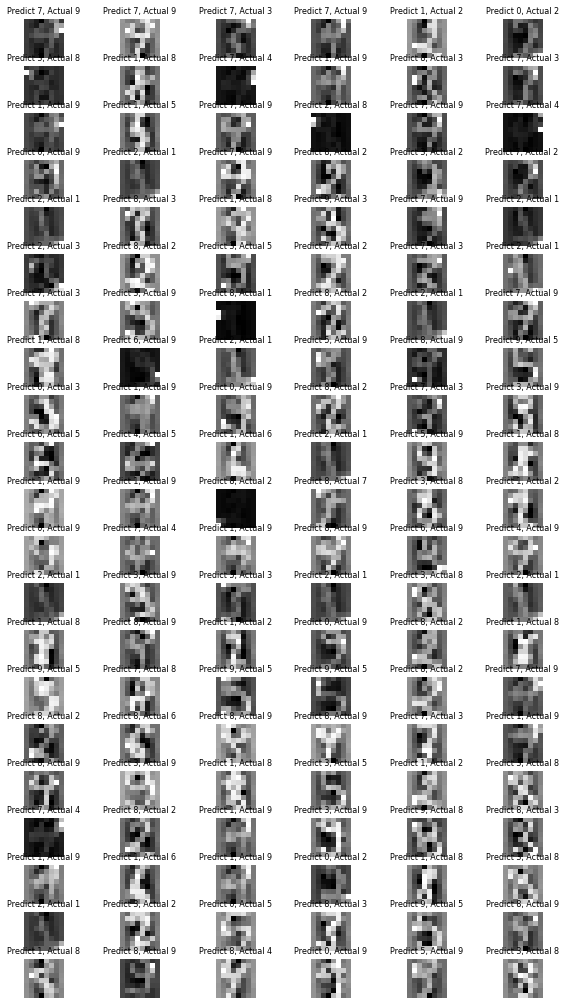

In [163]:
# display all of the misclassified digits as images

misclassiKNNimages = np.where(yTestKNN != knn_y_pred)[0]

figure, axis = plt.subplots(21, 6)
axis = axis.ravel()
for i, wrongIndex in enumerate(misclassiKNNimages) :
    axis[i].imshow(np.reshape(XTestKNN[wrongIndex], (8,8)), cmap=plt.cm.gray)
    axis[i].set_title(f'Predict {knn_y_pred[wrongIndex]}, '
                    f'Actual {yTestKNN[wrongIndex]}', fontsize = 8)
    axis[i].set(frame_on=False)
    axis[i].axis('off')
plt.box(False)
plt.axis('off')

In [ ]:
# find the best value of k

for c_val in range( 10, 51,  20):
    model = svm.SVC( kernel='rbf', C=c_val )
    scores = cross_val_score( model, X, y, cv=5 )
    print( "Used", c_val, "as C and got scores", np.mean(scores) )

## Part 2: Popularity of online news

### Task 2.1: Import the Data

In [32]:
#import data set
from numpy import asarray

dataset = pd.read_csv("OnlineNewsPopularity.csv")
dataset.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [33]:
# save data as numpy array "X", drop columns 'ur' and 'timedelta'

X = asarray(dataset.drop(labels=["url", " timedelta"], axis=1))

In [34]:
# export number of shares as separate numpy array "shares"  

shares = dataset[" shares"]

In [46]:
# find median in shares

med_shares = shares.median()
med_shares

1400.0

In [43]:
# find if shares are popular or not as bool values

pop_shares = shares.apply(lambda x: x > med_shares)
pop_shares

0        False
1        False
2         True
3        False
4        False
         ...  
39639     True
39640     True
39641     True
39642    False
39643    False
Name:  shares, Length: 39644, dtype: bool

In [44]:
## binary numpy array "y" that indicates whether or not an article is popular

y = pop_shares.to_numpy()
y

array([False, False,  True, ...,  True, False, False])

### Task 2.2: Exploratory Data Analysis

The values appear reasonable. The min number of shares is 0; the max is 39643; the median is 1400

### Task 2.3: Classification Using k-NN

In [79]:
scores = [0 for x in range(0, 21)]

for k_value in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k_value)
    scores[k_value] = np.mean(cross_val_score(model, X, y, cv=10))

print(scores)
best_k_value = np.argmax(scores)


[0, 0.9526970825574177, 0.9493606455617629, 0.9566045934202358, 0.9538112973308503, 0.958833022967101, 0.9560490378646802, 0.9549317194289261, 0.9532588454376164, 0.9504748603351955, 0.9482495344506517, 0.9488112973308503, 0.9460273122284295, 0.9454717566728739, 0.9432433271260086, 0.9421384233395406, 0.9421353196772191, 0.9421384233395406, 0.9426939788950962, 0.941024208566108, 0.9387988826815642]


5

The best k value is 5 as found above. A k value of 5 gave us 95.883% accuracy from the cross validated model.

### Task 2.4 Classification using SVM

In [87]:
# using the first 5000 articles
svm_X = X[0 : 5000]
svm_y = y[0 : 5000]

scores = [0]

for c_value in np.arange(0.1, 6.1, 0.1):
    model = svm.SVC( kernel='rbf', C=c_value )
    scores.append(np.mean(cross_val_score(model, svm_X, svm_y, cv=10)))

print(scores)
best_index = np.argmax(scores)
print(scores[best_index])
print(best_index / 10)

[0, 0.9137368094351335, 0.9354345127250154, 0.9449006828057106, 0.948792675356921, 0.9538019863438857, 0.9565797641216636, 0.9599224084419614, 0.9615890751086281, 0.9638112973308504, 0.9643699565487275, 0.9643699565487275, 0.9638144009931718, 0.9649286157666046, 0.9654872749844816, 0.9654872749844816, 0.9654872749844816, 0.9654872749844816, 0.9665983860955928, 0.9682712600869025, 0.9688268156424581, 0.9688268156424581, 0.9693823711980135, 0.9693823711980135, 0.9693823711980135, 0.9693823711980135, 0.9693823711980135, 0.9682712600869025, 0.9682712600869025, 0.9677126008690253, 0.9677126008690253, 0.9677126008690253, 0.9677126008690253, 0.9677126008690253, 0.9677126008690253, 0.968268156424581, 0.9688237119801364, 0.9688237119801364, 0.9688237119801364, 0.9688237119801364, 0.968268156424581, 0.9677094972067039, 0.9677094972067039, 0.9677094972067039, 0.9677094972067039, 0.9677094972067039, 0.9677094972067039, 0.9677094972067039, 0.9677094972067039, 0.9677094972067039, 0.9677094972067039,

The best c value is 2.2 as found above. A k value of 2.2 gave us 96.938% accuracy from the cross validated model.

### Task 2.5 Classification using decision trees

In [117]:
# scores is scores[md_val][mss_val]
scores = [[0 for x in range(31)]]

for md in range(1, 31):
    scores.append([0, 0])
    
    for mss in range(2, 31):
        model = tree.DecisionTreeClassifier(min_samples_split=mss, max_depth=md)
        scores[md].append(np.mean(cross_val_score(model, X, y, cv=10, n_jobs=-1)))

print(scores)


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054, 0.1975512104283054], [0, 0, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.31111421477343265, 0.3111142147734

In [127]:
np_scores = np.array(scores)
print(np.amax(np_scores))
print(np.unravel_index(np.argmax(np_scores, axis=None), np_scores.shape))

0.8374984481688392
(17, 4)


The best max_depth value is 17 and the best min_split_samples is 4 as found above. These values gave us 83.479% accuracy from the cross validated model.

### Task 2.6 Describe your findings

1. SVM gave us the highest accuracy at over 96%. The KNN gave us around 95% and the decision tree around 83%
2. For the KNN clasifier, increasing k led to underfitting the data and less accuracy. Decreasing k led to over fitting and less accuracy. For the SVM, increasing the c parameter led to overfitting and decreasing it led to underfitting, both reducing the accuracy. For the decision tree, increasing max depth or decreasing min samples split led to more overfitting, and decreasing max depth or increasing min samples led to underfitting, resulting in a lower accuract.
3. The decision tree would be the easiest model to interpret, because the decisions that it makes are easily written in plain english. The decision boundaries made by the SVM and the KNN classifier are a much more complex shape.
4.

[Text(0.2435865080758427, 0.9666666666666667, 'X[36] <= -1.652\ngini = 0.9\nsamples = 1797\nvalue = [178, 182, 177, 183, 181, 182, 181, 179, 174, 180]'),
 Text(0.05898876404494382, 0.9, 'X[28] <= -1.208\ngini = 0.547\nsamples = 275\nvalue = [174, 0, 4, 1, 6, 25, 5, 0, 3, 57]'),
 Text(0.02247191011235955, 0.8333333333333334, 'X[21] <= -1.179\ngini = 0.17\nsamples = 188\nvalue = [171, 0, 2, 0, 6, 6, 3, 0, 0, 0]'),
 Text(0.011235955056179775, 0.7666666666666667, 'X[53] <= -0.872\ngini = 0.719\nsamples = 16\nvalue = [1, 0, 1, 0, 5, 6, 3, 0, 0, 0]'),
 Text(0.0056179775280898875, 0.7, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 6, 0, 0, 0, 0]'),
 Text(0.016853932584269662, 0.7, 'X[37] <= -0.553\ngini = 0.64\nsamples = 10\nvalue = [1, 0, 1, 0, 5, 0, 3, 0, 0, 0]'),
 Text(0.011235955056179775, 0.6333333333333333, 'X[41] <= 0.307\ngini = 0.56\nsamples = 5\nvalue = [1, 0, 1, 0, 0, 0, 3, 0, 0, 0]'),
 Text(0.0056179775280898875, 0.5666666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 

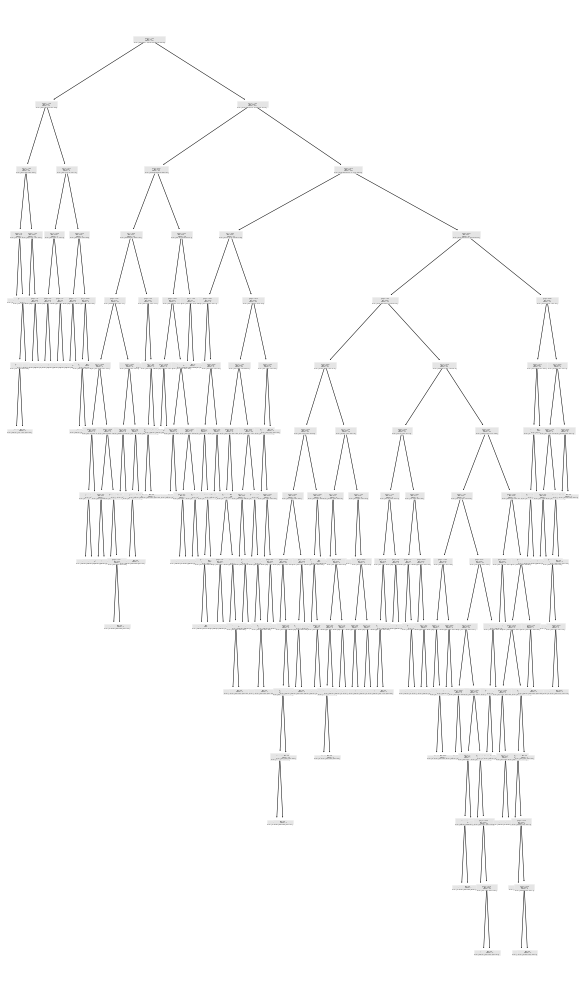

In [136]:
model = tree.DecisionTreeClassifier(min_samples_split=4, max_depth=17)
model.fit(X, y)
tree.plot_tree(model)